## Using ML to predict NBA 2024 Playoffs Results 

Importing NBA_TeamStast Data frame 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("NBA_TeamStats_1992-2024_df.csv")

df.head()


,Rk,Year,Team,Playoffs,Championship,Age,W,L,PW,PL,...,3PAr,TS%,eFG%,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


In [2]:
# # Rename the columns needed
df=pd.read_csv("NBA_TeamStats_1992-2024_df.csv")
df_renamed = df.rename(columns={
                                        "Rk": "RANK",
                                        "W": "WINS",
                                        "L": "LOSSES",
                                        "PW": "PYTHAGOREAN WINS",
                                        "PL": "PYTHAGOREAN LOSSES",
                                        "MOV": "MARGIN OF VICTORY",
                                        "SOS": "STRENGTH OF SCHEDULE",
                                        "SRS": "SIMPLE RATING SYSTEM",
                                        "ORtg": "OFFENSIVE RATING",
                                        "DRtg": "DEFENSIVE RATING",
                                        "Pace": "PACE FACTOR",
                                        "FTr": "FREE THROW ATTEMPT RATE",
                                        "3PAr": "3-POINT ATTEMPT RATE",
                                        "TS%": "TRUE SHOOTING PERCENTAGE",
                                        "eFG%": "EFFECTIVE FIELD GOAL PERCENTAGE",
                                        "TOV%": "TURNOVER PERCENTAGE",
                                        "ORB%": "OFFENSIVE REBOUND PERCENTAGE",
                                        "FT/FGA": "FREE THROWS PER FIELD GOAL ATTEMPT",
                                        "eFG%.1": "OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE",
                                        "TOV%.1": "OPPONENT TURNOVER PERCENTAGE",
                                        "DRB%": "DEFENSIVE REBOUND PERCENTAGE",
                                        "FT/FGA.1": "OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT",
                                         })


df_renamed.head()

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,Portland Trail Blazers,1,0,28.1,57,25,59,23,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,Utah Jazz,1,0,28.5,55,27,57,25,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,Phoenix Suns,1,0,27.0,53,29,56,26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,Cleveland Cavaliers,1,0,27.6,57,25,55,27,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


## Exploring the data. 

Determining if same amount of information/data is available accross the years.

<Axes: ylabel='Frequency'>

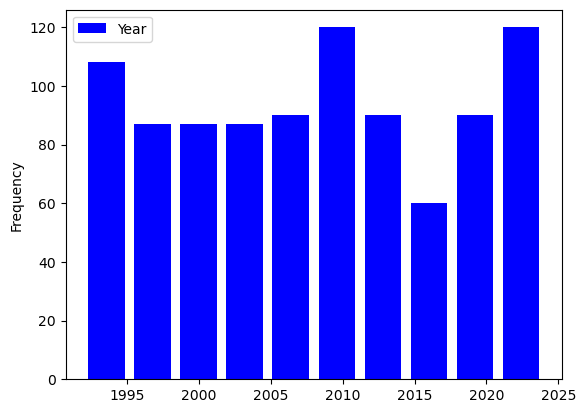

In [27]:
#Creating a dataframe to evaluate how many rows of data are in each year
df_year = df_renamed[["Year"]]
df_year.plot.hist(color="blue",rwidth=0.8) 


Filtering the df only to visualize teams that made it to the Championship over the years

In [4]:
#Filtering the df by Championship = 1
df_won_champ = df_renamed.loc[(df_renamed["Championship"].str.contains("1"))]

df_won_champ.head()

,RANK,Year,Team,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,Chicago Bulls,1,1,27.6,67,15,66,16,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
28,2,1993,Chicago Bulls,1,1,28.1,57,25,58,24,...,0.093,0.535,0.499,12.0,36.3,0.199,0.493,15.4,68.7,0.239
60,7,1994,Houston Rockets,1,1,28.1,58,24,53,29,...,0.191,0.545,0.507,15.0,27.6,0.218,0.458,13.3,69.7,0.192
91,11,1995,Houston Rockets,1,1,28.5,47,35,47,35,...,0.267,0.568,0.529,15.0,26.9,0.232,0.489,13.9,67.7,0.199
108,1,1996,Chicago Bulls,1,1,29.9,72,10,70,12,...,0.196,0.555,0.517,13.1,36.9,0.217,0.482,16.1,71.1,0.222


In [32]:
#Creating a df to be used as a table correlation for further analysis

#New df filtered by who won the Championship 
df_won_champ_corr = df_renamed.loc[(df_renamed["Championship"].str.contains("1"))]

df_won_champ_corr.drop(df_won_champ_corr.columns[2], axis=1, inplace=True)

#Correlation table
df_won_champ_corr.corr().head()

/var/folders/30/yg7n3vrj7tz78s275sqssmb80000gn/T/ipykernel_8253/4020943255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_won_champ_corr.drop(df_won_champ_corr.columns[2], axis=1, inplace=True)


,RANK,Year,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,STRENGTH OF SCHEDULE,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
RANK,1.000000,0.054370,NaN,-0.015707,-0.470359,0.710106,-0.637549,0.865052,-0.848616,0.428351,...,0.224499,0.111130,0.118063,0.256846,-0.201502,0.002095,0.341107,-0.429047,0.040638,-0.122462
Year,0.054370,1.000000,NaN,-0.297544,-0.168811,0.168400,-0.199732,0.191658,-0.142018,-0.013333,...,0.876163,0.723235,0.719323,-0.065042,-0.829626,-0.482076,0.651239,-0.422564,0.904730,-0.423361
Championship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.015707,-0.297544,NaN,1.000000,0.051175,-0.250748,0.036424,-0.220917,0.112967,0.188284,...,-0.247458,-0.251511,-0.255604,0.121699,0.254179,0.215583,-0.264870,0.148467,-0.190890,0.015668
WINS,-0.470359,-0.168811,NaN,0.051175,1.000000,-0.557472,0.929614,-0.401585,0.657441,-0.029892,...,-0.147878,0.050477,0.042134,-0.321526,0.247783,-0.114498,-0.119220,0.313871,-0.153242,0.280620


Heat map based on correlation table to identify potential indication of most important variables before starting the prediction

<Axes: >

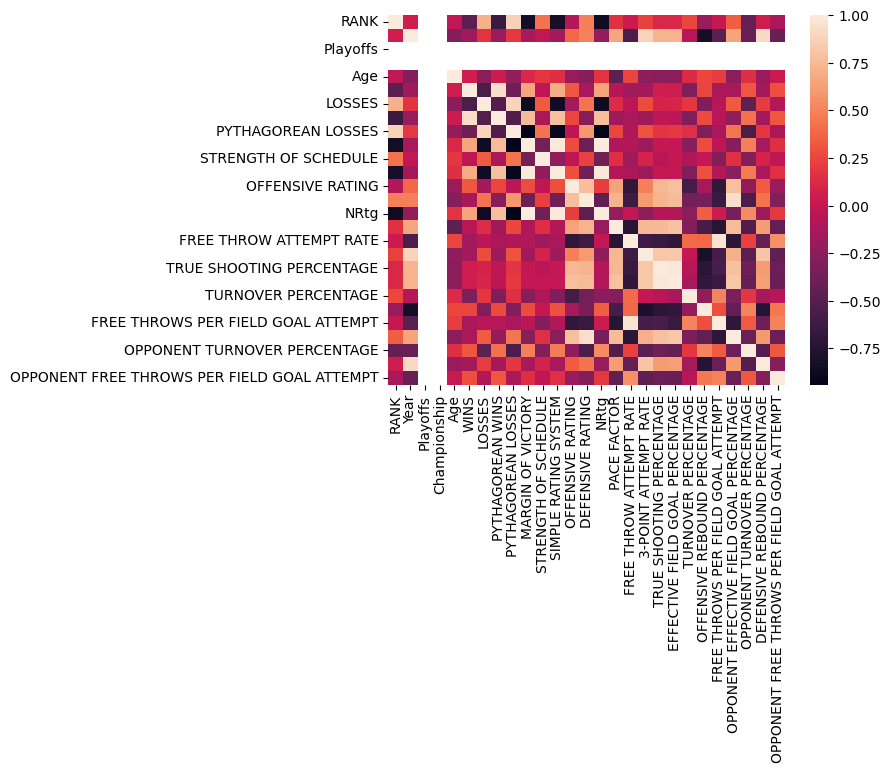

In [28]:
#correlation table to heatmap using sns
sns.heatmap(df_won_champ_corr.corr())

In [29]:
#df grouped by Championship
by_win = df_won_champ.groupby('Championship')
by_win["Team"].value_counts()

#Team counts by wins df
team_counts = by_win["Team"].value_counts()

team_counts_by_win = team_counts.reset_index()
team_counts_by_win.columns = ["Championship",'Team', 'Count']

team_counts_by_win


,Championship,Team,Count
0,1,Los Angeles Lakers,6
1,1,Chicago Bulls,5
2,1,San Antonio Spurs,5
3,1,Golden State Warriors,4
4,1,Miami Heat,3
5,1,Houston Rockets,2
6,1,Boston Celtics,1
7,1,Dallas Mavericks,1
8,1,Denver Nuggets,1
9,1,Detroit Pistons,1


In [8]:
#Championship column dropped
by_team = team_counts_by_win.drop(columns=['Championship'])

by_team

,Team,Count
0,Los Angeles Lakers,6
1,Chicago Bulls,5
2,San Antonio Spurs,5
3,Golden State Warriors,4
4,Miami Heat,3
5,Houston Rockets,2
6,Boston Celtics,1
7,Dallas Mavericks,1
8,Denver Nuggets,1
9,Detroit Pistons,1


In order to make a prediction is important to recognize which teams have performed better over the years

Text(0.5, 1.0, 'Championships won by team')

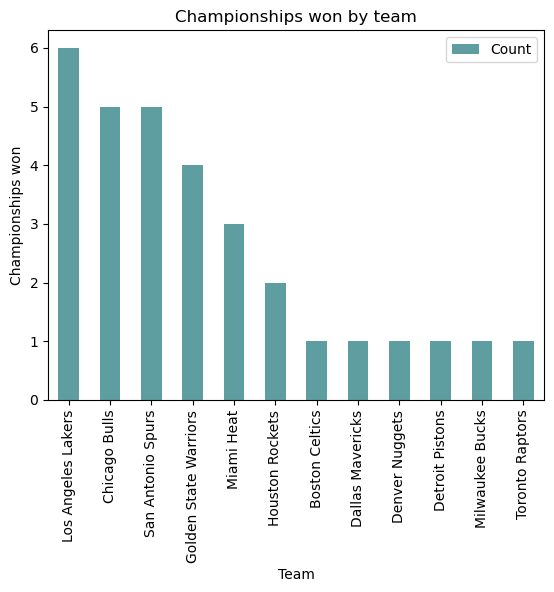

In [9]:
#Plotting Team vs age 

by_team.plot(x='Team', y='Count', kind='bar', color= "cadetblue")
#setting x and y labels 
plt.xlabel('Team')
plt.ylabel('Championships won')
#title
plt.title('Championships won by team')


Is Age an importan factor? 

The average age in the winer teams is narrowed between 26.6 to 31.7

In [10]:
#df Winners Teams and age 
df_team_age = df_won_champ[["Team" , "Age"]]

df_team_age

,Team,Age
0,Chicago Bulls,27.6
28,Chicago Bulls,28.1
60,Houston Rockets,28.1
91,Houston Rockets,28.5
108,Chicago Bulls,29.9
137,Chicago Bulls,30.7
168,Chicago Bulls,31.7
195,San Antonio Spurs,30.1
224,Los Angeles Lakers,29.2
260,Los Angeles Lakers,29.2


In [31]:
df_team_age.min()
df_team_age.max()


Team    Toronto Raptors
Age                31.7
dtype: object

Text(0.5, 1.0, 'Team vs Age')

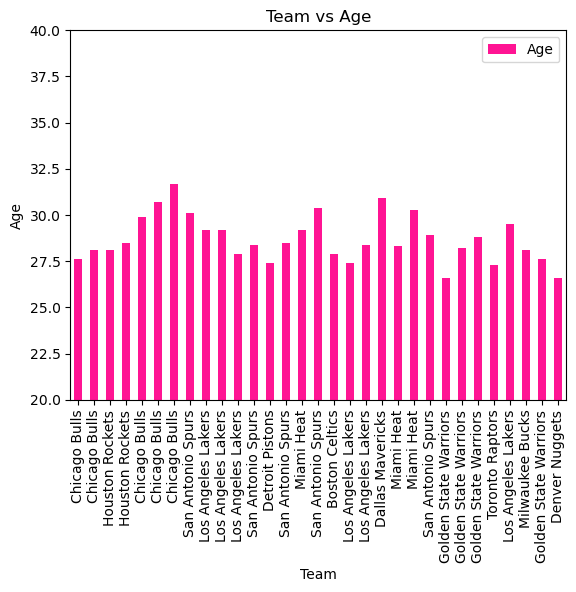

In [11]:
#Plotting winners teams vs age 
df_team_age = df_won_champ[["Team" , "Age"]]

df_team_age.plot(x='Team', y='Age', kind='bar', color= "deeppink")
#laxis imits
plt.ylim(20, 40) 
#setting x and y labels  
plt.xlabel('Team')
plt.ylabel('Age')
#title 
plt.title('Team vs Age')



Understanding if age correlates directly with wins

Text(0.5, 1.0, 'Age vs Wins')

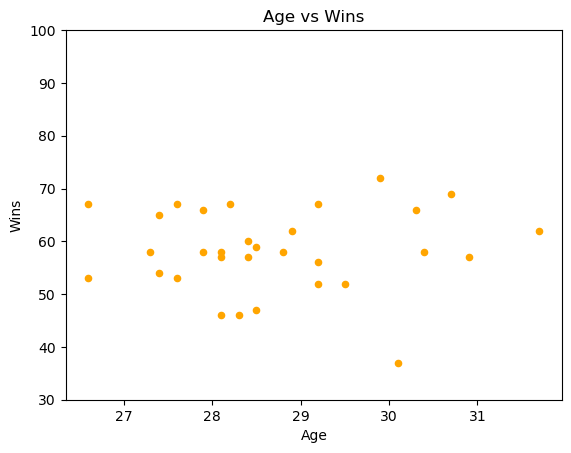

In [13]:
#Team vs age 
df_age_wins = df_won_champ[["Age" , "WINS"]]

df_age_wins.plot.scatter(x='Age', y='WINS', color= "orange")
#axis limits
plt.ylim(30, 100) 
#setting x and y labels  
plt.xlabel('Age')
plt.ylabel('Wins')
#title 
plt.title('Age vs Wins')

Text(0.5, 1.0, 'Margin of Victory vs Offensive Rebound %')

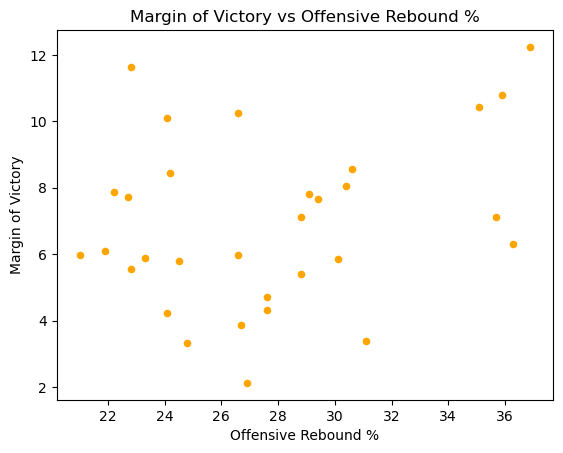

In [14]:
df_age_wins = df_won_champ[["OFFENSIVE REBOUND PERCENTAGE" , "MARGIN OF VICTORY"]]

df_age_wins.plot.scatter(x='OFFENSIVE REBOUND PERCENTAGE', y="MARGIN OF VICTORY", color= "orange")
#axis limits
#plt.ylim(30, 100) 
plt.xlabel('Offensive Rebound %')
plt.ylabel('Margin of Victory')
#title 
plt.title('Margin of Victory vs Offensive Rebound %')

In [15]:
df_renamed.drop(df_renamed.columns[2], axis=1, inplace=True)
df_renamed.head()

,RANK,Year,Playoffs,Championship,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,1,1,27.6,67,15,66,16,10.44,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,1,0,28.1,57,25,59,23,7.27,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,1,0,28.5,55,27,57,25,6.39,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,1,0,27.0,53,29,56,26,5.94,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,1,0,27.6,57,25,55,27,5.45,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


## Predict Model Performance

Creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier.

## Split the Data into Training and Testing Sets

In [16]:
# Create the labels set `y` and features DataFrame `X`
y = df_renamed['Championship']
X = df_renamed.drop(columns=['Championship'])
display(y.head())
display(X.head())


0    1
1    0
2    0
3    0
4    0
Name: Championship, dtype: object

,RANK,Year,Playoffs,Age,WINS,LOSSES,PYTHAGOREAN WINS,PYTHAGOREAN LOSSES,MARGIN OF VICTORY,STRENGTH OF SCHEDULE,...,3-POINT ATTEMPT RATE,TRUE SHOOTING PERCENTAGE,EFFECTIVE FIELD GOAL PERCENTAGE,TURNOVER PERCENTAGE,OFFENSIVE REBOUND PERCENTAGE,FREE THROWS PER FIELD GOAL ATTEMPT,OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE,OPPONENT TURNOVER PERCENTAGE,DEFENSIVE REBOUND PERCENTAGE,OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT
0,1,1992,1,27.6,67,15,66,16,10.44,-0.37,...,0.063,0.556,0.518,11.8,35.1,0.221,0.476,14.1,69.3,0.219
1,2,1992,1,28.1,57,25,59,23,7.27,-0.33,...,0.128,0.541,0.495,13.6,35.6,0.253,0.471,14.3,69.9,0.251
2,3,1992,1,28.5,55,27,57,25,6.39,-0.69,...,0.067,0.557,0.504,13.7,32.7,0.286,0.475,13.0,68.9,0.214
3,4,1992,1,27.0,53,29,56,26,5.94,-0.26,...,0.083,0.556,0.508,13.1,31.7,0.258,0.471,13.0,67.7,0.223
4,5,1992,1,27.6,57,25,55,27,5.45,-0.11,...,0.101,0.557,0.506,11.8,30.5,0.259,0.483,12.3,66.5,0.174


In [17]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

Championship
0       906
1        31
Null      2
Name: count, dtype: int64

In [18]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


## Scale the Features
Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [19]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [20]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

# Fit the Standard Scaler with the test data
scaler.fit(X_test)

StandardScaler()

In [21]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)

# Scale the test data
X_test_scaled = scaler.transform(X_test)

## Creation and Fitting Logistic Regression Model

Creating a Logistic Regression model, fitting it to the training data, making predictions with the testing data, and printing the model's accuracy score.

In [22]:
# Make and save testing predictions with the saved logistic regression model using the test data
#X_test_scaled = scaler.transform(X_test)
logistic_regression_model = LogisticRegression(random_state=1)
logistic_regression_model.fit(X_train_scaled, y_train)
# Review the predictions
y_pred = logistic_regression_model.predict(X_test_scaled)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [23]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train):.3f}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test):.3f}")

# Generate predictions from the model we just fit
testing_predictions_lr = logistic_regression_model.predict(X_test_scaled)

# Display the accuracy score for the testing dataset
print('Logistic Regression Model Accuracy Score: %.3f' % accuracy_score(y_test, testing_predictions_lr) )

Training Data Score: 0.974
Testing Data Score: 0.970
Logistic Regression Model Accuracy Score: 0.970


## Using Random Forest Classifier Model

Using Random Forest Classifier model to fit the training data, make predictions with the testing data, and print the model's accuracy score.

In [24]:
# Make and save testing predictions with the saved logistic regression model using the test data
random_forest_model = RandomForestClassifier(random_state=1)
random_forest_model.fit(X_train_scaled, y_train)

# Review the predictions
y_pred = random_forest_model.predict(X_train_scaled)
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', 'Null', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [25]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print(f"Testing Data Score: {random_forest_model.score(X_test_scaled, y_test):.3f}")

Testing Data Score: 0.970


In [26]:
""""# Drop rows with missing values
# df_cleaned = df_renamed.dropna()

# Drop rows with missing values in the Championship column
df_cleaned = df_renamed.dropna(subset=['Championship'])

# Convert the 'Championship' column to numeric
df_cleaned['Championship'] = pd.to_numeric(df_cleaned['Championship'], errors='coerce')

# Drop rows with NaN values after conversion to numeric
df_cleaned = df_cleaned.dropna(subset=['Championship'])

# Convert the 'Championship' to a binary classification: 1 if at least 1 win, else 0
df_cleaned['Championship_Binary'] = df_cleaned['Championship'].apply(lambda x: 1 if x > 0 else 0)

# Display the first few rows of the cleaned dataset
print(df_cleaned)""""

SyntaxError: unterminated string literal (detected at line 17) (3540246981.py, line 17)

In [ ]:
""""# Feature selection (choose relevant features for prediction)
features = ['WINS', 'LOSSES', 'PYTHAGOREAN WINS', 'PYTHAGOREAN LOSSES', 'MARGIN OF VICTORY', 'STRENGTH OF SCHEDULE',
            'SIMPLE RATING SYSTEM', 'OFFENSIVE RATING', 'DEFENSIVE RATING', 'PACE FACTOR', 'FREE THROW ATTEMPT RATE',
            '3-POINT ATTEMPT RATE', 'TRUE SHOOTING PERCENTAGE', 'EFFECTIVE FIELD GOAL PERCENTAGE', 'TURNOVER PERCENTAGE',
            'OFFENSIVE REBOUND PERCENTAGE', 'FREE THROWS PER FIELD GOAL ATTEMPT', 'OPPONENT EFFECTIVE FIELD GOAL PERCENTAGE',
            'OPPONENT TURNOVER PERCENTAGE', 'DEFENSIVE REBOUND PERCENTAGE', 'OPPONENT FREE THROWS PER FIELD GOAL ATTEMPT']

target = 'Championship'  # Binary target variable for logistic regression

# Split the data into features (X) and target (y)
X = df_cleaned[features]
y = df_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')""""

Accuracy: 0.973404255319149
Confusion Matrix:
[[181   0]
 [  5   2]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       181
         1.0       1.00      0.29      0.44         7

    accuracy                           0.97       188
   macro avg       0.99      0.64      0.72       188
weighted avg       0.97      0.97      0.97       188

